In [1]:
!pip3 install matplotlib

In [2]:
import pandas as pd
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [3]:
nor = 100000
interval = 2.0

In [4]:
databases = ["mysql", "rds-mysql", "aurora-mysql", 
             "postgres", "rds-postgres", "aurora-postgres",
             "mongodb", "documentdb", "dynamodb"]
db_load_dfs = {}
db_run_a_dfs = {}
db_run_b_dfs = {}
db_run_c_dfs = {}
db_run_d_dfs = {}
db_run_e_dfs = {}

In [5]:
for db in databases:
    db_load_dfs[db] = pd.read_csv(f"results/{db}/{db}_load_a_{nor}_{interval}.csv", skiprows=[1])
    db_run_a_dfs[db] = pd.read_csv(f"results/{db}/{db}_run_a_{nor}_{interval}.csv", skiprows=[1])
    db_run_b_dfs[db] = pd.read_csv(f"results/{db}/{db}_run_b_{nor}_{interval}.csv", skiprows=[1])
    db_run_c_dfs[db] = pd.read_csv(f"results/{db}/{db}_run_c_{nor}_{interval}.csv", skiprows=[1])
    db_run_d_dfs[db] = pd.read_csv(f"results/{db}/{db}_run_d_{nor}_{interval}.csv", skiprows=[1])
    db_run_e_dfs[db] = pd.read_csv(f"results/{db}/{db}_run_e_{nor}_{interval}.csv", skiprows=[1])

In [6]:
db_load_dfs["mysql"]

,Count,Throughput,TotalLatency,MaxLatency,MinLatency,AvgLatency,Total
0,914.0,457.00000,1901.100098,7.790283,1.596680,2.079978,914.0
1,920.0,460.00000,1916.596191,14.010742,1.624512,2.083257,1834.0
2,922.0,461.00000,1908.906494,5.542969,1.621094,2.070397,2757.0
3,923.0,461.50000,1918.525879,7.324951,1.610107,2.078576,3680.0
4,909.0,454.50000,1896.189209,8.852783,1.619141,2.086017,4590.0
...,...,...,...,...,...,...,...
107,933.0,466.50000,1902.274902,4.364746,1.611572,2.038880,96515.0
108,936.0,468.00000,1911.308105,7.842041,1.603271,2.041996,97452.0
109,932.0,466.00000,1912.500244,5.539795,1.613525,2.052039,98385.0
110,925.0,462.50000,1912.230225,7.516602,1.615234,2.067276,99311.0


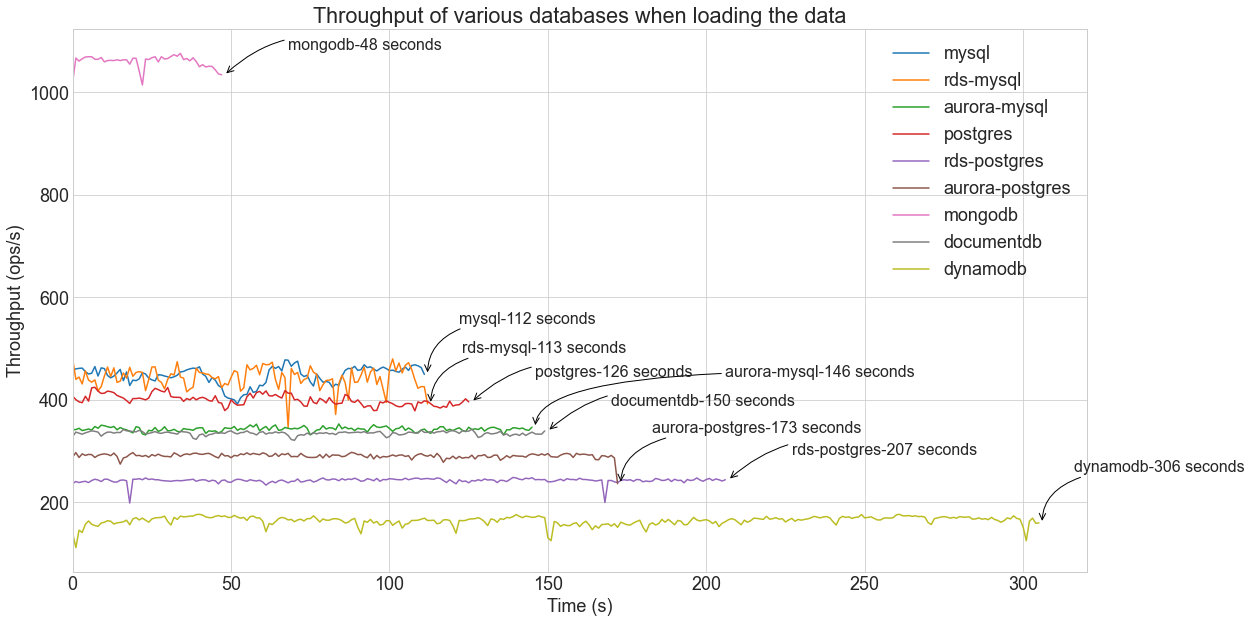

In [7]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 18})
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(40)

ax = fig.add_subplot(121)

stats_load_values = {}
font_size=16

# Graphs for "load" operation
for db in databases:
    stats_load_values[db] = (
        db_load_dfs[db]["MaxLatency"].max(),
        db_load_dfs[db]["MinLatency"].min(),
        db_load_dfs[db]["AvgLatency"].mean()
    )
    ax.plot(db_load_dfs[db]["Throughput"], label = db)
    if db not in ["postgres", "rds-postgres", "documentdb", "mongodb", "aurora-mysql"]:
        ax.annotate(
            f"{db}-{db_load_dfs[db]['Throughput'].size} seconds",
            xy=(db_load_dfs[db]["Throughput"].size, db_load_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_load_dfs[db]["Throughput"].size+10, db_load_dfs[db]["Throughput"].iloc[-1]+100),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=90"),
            fontsize=font_size
        )
    elif db not in ["aurora-mysql"]:
        ax.annotate(
            f"{db}-{db_load_dfs[db]['Throughput'].size} seconds",
            xy=(db_load_dfs[db]["Throughput"].size, db_load_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_load_dfs[db]["Throughput"].size+20, db_load_dfs[db]["Throughput"].iloc[-1]+50),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=0.3"),
            fontsize=font_size        
        )
    else:
        ax.annotate(
            f"{db}-{db_load_dfs[db]['Throughput'].size} seconds",
            xy=(db_load_dfs[db]["Throughput"].size, db_load_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_load_dfs[db]["Throughput"].size+60, db_load_dfs[db]["Throughput"].iloc[-1]+100),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=90"),
            fontsize=font_size        
        )
    
ax.set(title='Throughput of various databases when loading the data')
ax.set_xlim(xmin=0)
plt.xlabel("Time (s)")
plt.ylabel("Throughput (ops/s)")
plt.legend(prop={"size": 18})

In [8]:
stats_load_values

{'mysql': (34.699951171875, 1.587646484375, 2.137091846756182),
 'rds-mysql': (46.138671875, 1.066650390625, 2.1595984125118077),
 'aurora-mysql': (22.4462890625, 2.009521484375, 2.804192119300987),
 'postgres': (36.19970703125, 2.086181640625, 2.401250743599051),
 'rds-postgres': (385.308349609375, 3.659423828125, 4.014751252169886),
 'aurora-postgres': (21.6689453125, 2.944091796875, 3.326945260652814),
 'mongodb': (25.962646484375, 0.816650390625, 0.8560813811457187),
 'documentdb': (41.7021484375, 2.463623046875, 2.8862945471009946),
 'dynamodb': (43.5205078125, 5.148681640625, 6.013258740012259)}

### Summary of `load` operation

- The fastest database in terms of the load operations is `MongoDB` running on EC2. It finishes the writes in 48s.
- After MongoDB comes the `MySQL` database. The performance is almost similar for the instance running on an EC2 and the RDS MySQL. Aurora MySQL takes a bit longer.
- PostgreSQL database performance is lower compared to MongoDB and MySQL but it's still better than the AWS proprietery NoSQL databases (DocumentDB and DynamoDB)
- It takes a total of 306 seconds for DynamoDB to finish executing. That is about 5 times longer than MongoDB.

The maximum, average and minimum latency is also recorded for all databases in each interval. The following table lists down the highest value of MaxLatency, lowest value of MinLatency and the mean of AvgLatency in milliseconds.

|Database|Maximum (ms)|MIN (ms)|AVG (ms)|
|--------|------------|--------|--------|
|mysql|34.699951171875|1.587646484375|2.137091846756182|
|rds-mysql|46.138671875|1.066650390625|2.1595984125118073|
|aurora-mysql|22.4462890625|2.009521484375|2.804192119300987|
|postgres|36.19970703125|2.086181640625|2.4012507435990496|
|rds-postgres|385.308349609375|3.659423828125|4.014751252169885|
|aurora-postgres|21.6689453125|2.944091796875|3.3269452606528125|
|mongodb|25.962646484375|0.816650390625|0.856081381145719|
|documentdb|41.7021484375|2.463623046875|2.8862945471009955|
|dynamodb|43.5205078125|5.148681640625|6.013258740012262|

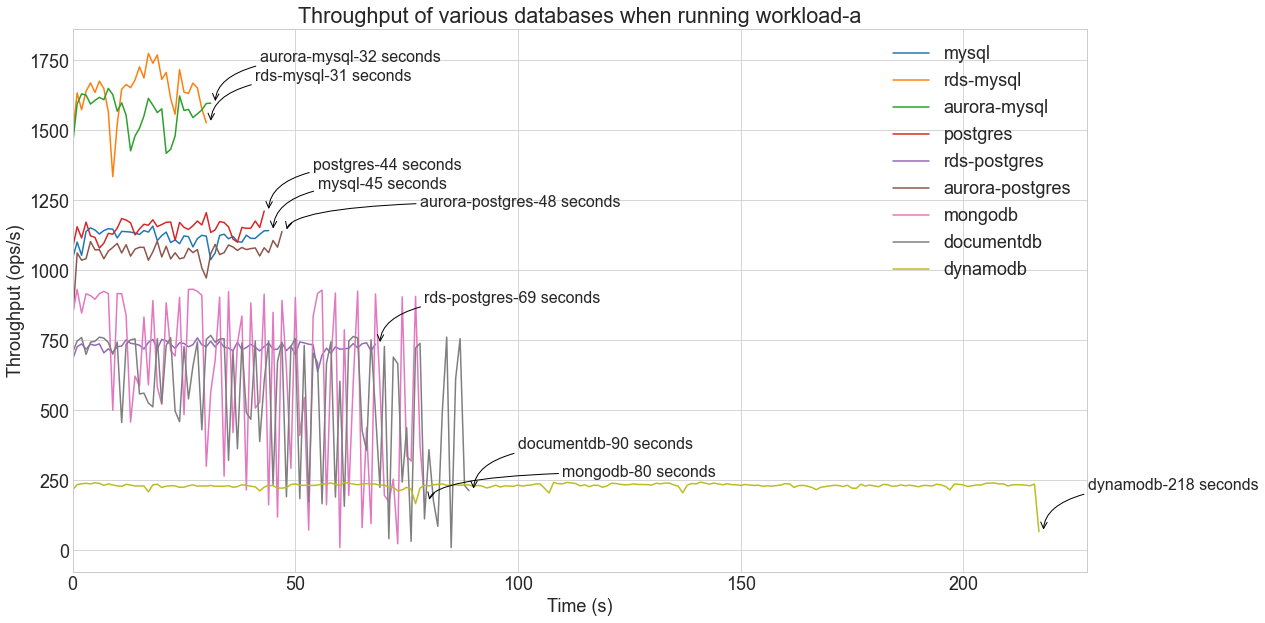

In [9]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(40)

ax = fig.add_subplot(121)

stats_run_a_values = {}

# Graphs for "load" operation
for db in databases:
    stats_run_a_values[db] = (
        db_run_a_dfs[db]["MaxLatency"].max(),
        db_run_a_dfs[db]["MinLatency"].min(),
        db_run_a_dfs[db]["AvgLatency"].mean()
    )
    ax.plot(db_run_a_dfs[db]["Throughput"], label = db)
    if db not in ["mongodb", "aurora-postgres"]:
        ax.annotate(
            f"{db}-{db_run_a_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_a_dfs[db]["Throughput"].size, db_run_a_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_a_dfs[db]["Throughput"].size+10, db_run_a_dfs[db]["Throughput"].iloc[-1]+150),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=font_size        
        )
    else:
        ax.annotate(
            f"{db}-{db_run_a_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_a_dfs[db]["Throughput"].size, db_run_a_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_a_dfs[db]["Throughput"].size+30, db_run_a_dfs[db]["Throughput"].iloc[-1]+90),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=font_size        
        )
    
ax.set(title='Throughput of various databases when running workload-a')
ax.set_xlim(xmin=0)
plt.xlabel("Time (s)")
plt.ylabel("Throughput (ops/s)")
plt.legend(prop={"size": 18})

### Summary of `workload-a` operation (read intensive)

- The Cloud databases perform much better in read queries with Aurora-MySQL and RDS-MySQL leading the graph.
- Followed by the insatnces running on EC2s
- The performance of MongoDB and DocumentDB is average whereas DynamoDB has got a poor read performance

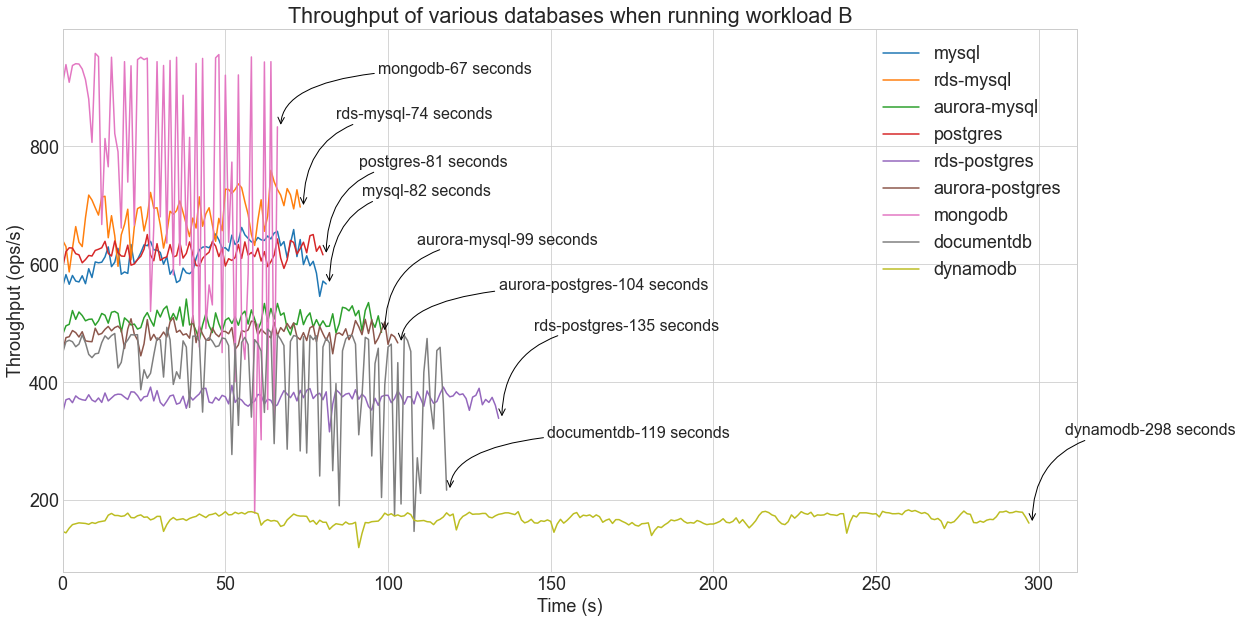

In [10]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(40)

ax = fig.add_subplot(121)

stats_run_b_values = {}

# Graphs for "load" operation
for db in databases:
    stats_run_b_values[db] = (
        db_run_b_dfs[db]["MaxLatency"].max(),
        db_run_b_dfs[db]["MinLatency"].min(),
        db_run_b_dfs[db]["AvgLatency"].mean()
    )
    ax.plot(db_run_b_dfs[db]["Throughput"], label = db)
    if db not in ["mongodb", "aurora-postgres", "documentdb"]:
        ax.annotate(
            f"{db}-{db_run_b_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_b_dfs[db]["Throughput"].size, db_run_b_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_b_dfs[db]["Throughput"].size+10, db_run_b_dfs[db]["Throughput"].iloc[-1]+150),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=font_size        
        )
    else:
        ax.annotate(
            f"{db}-{db_run_b_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_b_dfs[db]["Throughput"].size, db_run_b_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_b_dfs[db]["Throughput"].size+30, db_run_b_dfs[db]["Throughput"].iloc[-1]+90),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=font_size        
        )
    
ax.set(title='Throughput of various databases when running workload B')
ax.set_xlim(xmin=0)
plt.xlabel("Time (s)")
plt.ylabel("Throughput (ops/s)")
plt.legend(prop={"size": 18})

### Summary of `workload-b` operation (read+inserts)

- MonogDB performed better than any other database
- DynamoDB is again the last

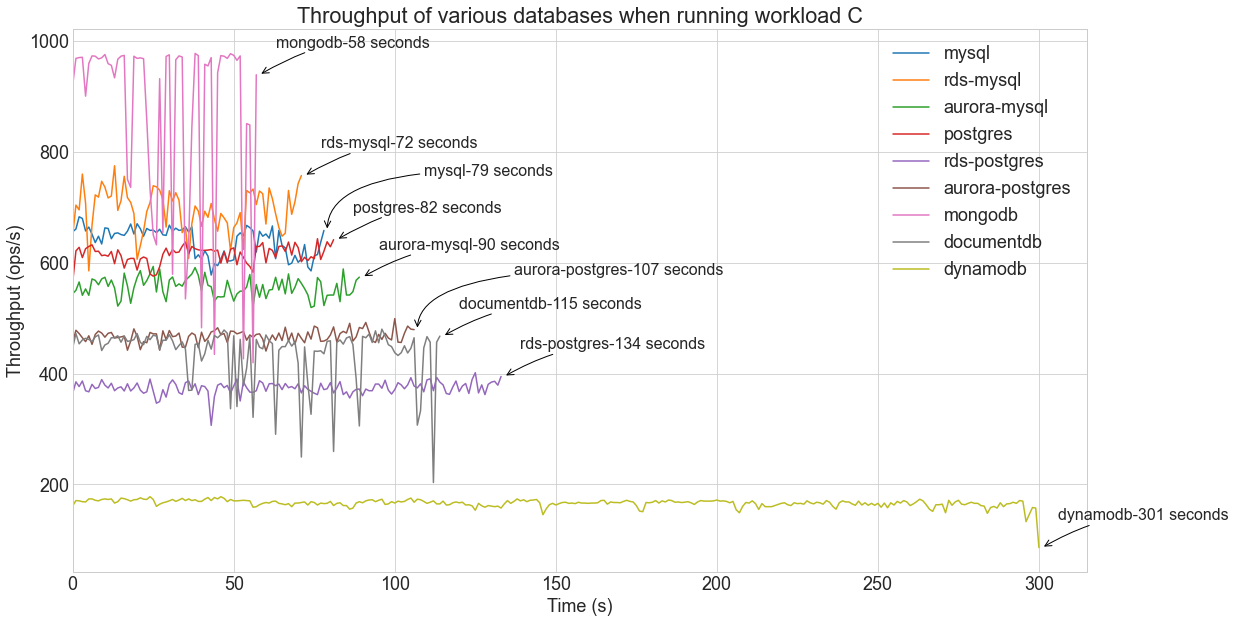

In [11]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(40)

ax = fig.add_subplot(121)

stats_run_c_values = {}

# Graphs for "load" operation
for db in databases:
    stats_run_c_values[db] = (
        db_run_c_dfs[db]["MaxLatency"].max(),
        db_run_c_dfs[db]["MinLatency"].min(),
        db_run_c_dfs[db]["AvgLatency"].mean()
    )
    ax.plot(db_run_c_dfs[db]["Throughput"], label = db)
    if db not in ["mysql", "aurora-postgres"]:
        ax.annotate(
            f"{db}-{db_run_c_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_c_dfs[db]["Throughput"].size, db_run_c_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_c_dfs[db]["Throughput"].size+5, db_run_c_dfs[db]["Throughput"].iloc[-1]+50),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=30"),
            fontsize=font_size          
        )
    else:
        ax.annotate(
            f"{db}-{db_run_c_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_c_dfs[db]["Throughput"].size, db_run_c_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_c_dfs[db]["Throughput"].size+30, db_run_c_dfs[db]["Throughput"].iloc[-1]+100),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=font_size          
        )
    
ax.set(title='Throughput of various databases when running workload C')
ax.set_xlim(xmin=0)
plt.xlabel("Time (s)")
plt.ylabel("Throughput (ops/s)")
plt.legend(prop={"size": 18})

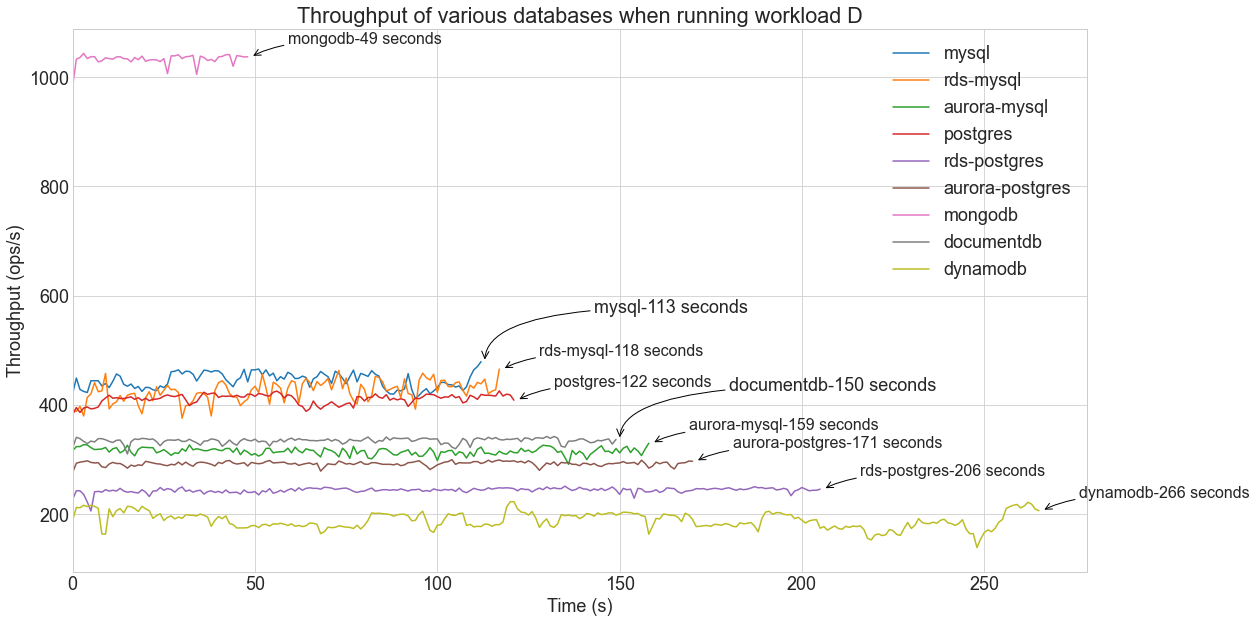

In [12]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(40)

ax = fig.add_subplot(121)

stats_run_d_values = {}

# Graphs for "load" operation
for db in databases:
    stats_run_d_values[db] = (
        db_run_d_dfs[db]["MaxLatency"].max(),
        db_run_d_dfs[db]["MinLatency"].min(),
        db_run_d_dfs[db]["AvgLatency"].mean()
    )
    ax.plot(db_run_d_dfs[db]["Throughput"], label = db)
    if db not in ["mysql", "documentdb"]:
        ax.annotate(
            f"{db}-{db_run_d_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_d_dfs[db]["Throughput"].size, db_run_d_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_d_dfs[db]["Throughput"].size+10, db_run_d_dfs[db]["Throughput"].iloc[-1]+25),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=30"),
            fontsize=font_size          
        )
    else:
        ax.annotate(
            f"{db}-{db_run_d_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_d_dfs[db]["Throughput"].size, db_run_d_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_d_dfs[db]["Throughput"].size+30, db_run_d_dfs[db]["Throughput"].iloc[-1]+90),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90")        
        )
    
ax.set(title='Throughput of various databases when running workload D')
ax.set_xlim(xmin=0)
plt.xlabel("Time (s)")
plt.ylabel("Throughput (ops/s)")
plt.legend(prop={"size": 18})

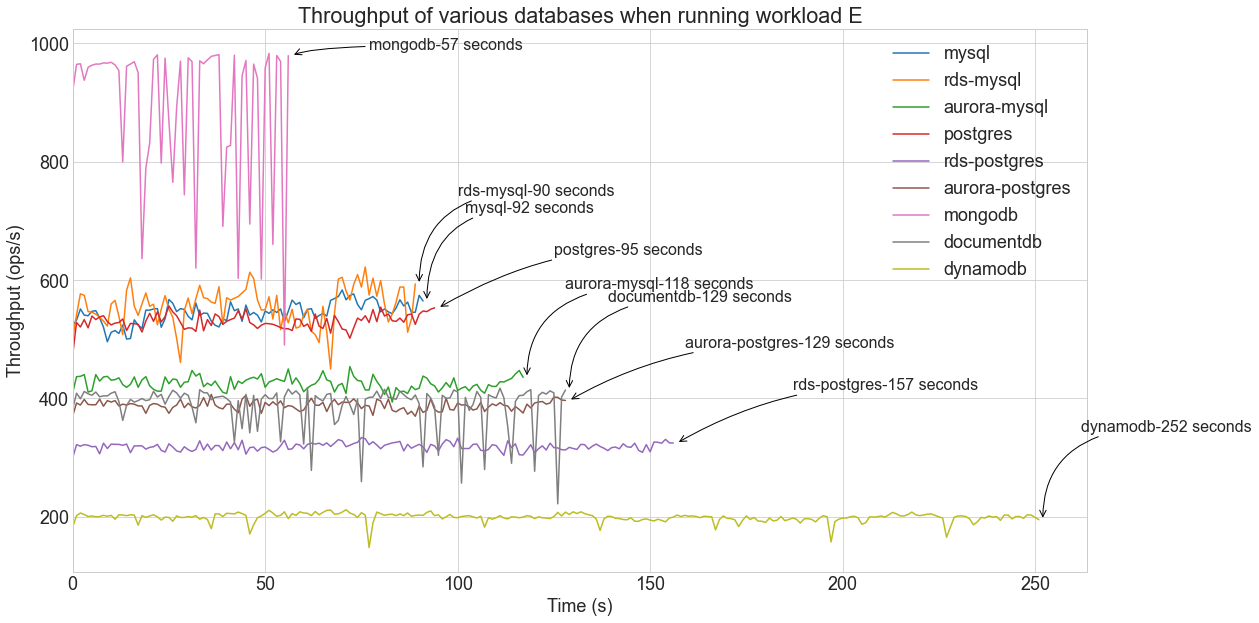

In [13]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(40)

ax = fig.add_subplot(121)

stats_run_e_values = {}

# Graphs for "load" operation
for db in databases:
    stats_run_e_values[db] = (
        db_run_e_dfs[db]["MaxLatency"].max(),
        db_run_e_dfs[db]["MinLatency"].min(),
        db_run_e_dfs[db]["AvgLatency"].mean()
    )
    ax.plot(db_run_e_dfs[db]["Throughput"], label = db)
    if db not in ["rds-postgres", "postgres", "aurora-postgres", "mongodb"]:
        ax.annotate(
            f"{db}-{db_run_e_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_e_dfs[db]["Throughput"].size, db_run_e_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_e_dfs[db]["Throughput"].size+10, db_run_e_dfs[db]["Throughput"].iloc[-1]+150),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=font_size                  
        )
    elif db not in ["mongodb"]:
        ax.annotate(
            f"{db}-{db_run_e_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_e_dfs[db]["Throughput"].size, db_run_e_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_e_dfs[db]["Throughput"].size+30, db_run_e_dfs[db]["Throughput"].iloc[-1]+90),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=30"),
            fontsize=font_size                  
        )
    else:
        ax.annotate(
            f"{db}-{db_run_e_dfs[db]['Throughput'].size} seconds",
            xy=(db_run_e_dfs[db]["Throughput"].size, db_run_e_dfs[db]["Throughput"].iloc[-1]), 
            xytext=(db_run_e_dfs[db]["Throughput"].size+20, db_run_e_dfs[db]["Throughput"].iloc[-1]+10),
            arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=30"),
            fontsize=font_size                  
        )
    
ax.set(title='Throughput of various databases when running workload E')
ax.set_xlim(xmin=0)
plt.xlabel("Time (s)")
plt.ylabel("Throughput (ops/s)")
plt.legend(prop={"size": 18})

### Sizes

|Database|Size (MB)|
|--------|---------|
|mysql|6.52|
|rds-mysql|6.52|
|aurora-mysql|6.52|
|postgres|8.35|
|rds-postgres|8.35|
|aurora-postgres|8.35|
|mongodb|4.93|
|documentdb|25.67|
|dynamodb|120|

## Conclusion

- MongoDB seems like a clear winner for mixed workloads including reads, inserts and updates. For read intensive operations SQL databases, particularly MySQL have turned out to be the best option.
- MongoDb also takes the least storage space for same number of records. Thus less costs.
- In terms of scalability and elasticity Aurora instances are the best. RDS instances can also be set up for storage auto-scaling. Whereas DynamoDB has got theoretically infinite storage and being a serverless database the capacity units can autoscale whenenever required.
- DynamoDB is good if we want thousands of concurrent connections to the database but don't want to compromise on the performance.